In [1]:
import sys
sys.path.append('../../')
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style='ticks', context='paper',
                               rc={'font.size': 6, 
                                   'axes.titlesize': 7,
                                   'axes.labelsize': 7,
                                   'axes.labelpad': 2,
                                   'xtick.labelsize': 5,
                                   'ytick.labelsize': 5,
                                   'legend.fontsize' : 5.5,
                                   'legend.markerscale': 0.5,
                                   'axes.spines.top': False,
                                   'axes.spines.right': False,
                                   'axes.linewidth': 0.4,
                                   'xtick.major.width': 0.4,
                                   'ytick.major.width': 0.4,
                                   'xtick.major.size': 2.5,
                                   'ytick.major.size': 2.5,
                                   'xtick.minor.size': 1.5,
                                   'ytick.minor.size': 1.5,
                                   'xtick.minor.width': 0.2,
                                   'ytick.minor.width': 0.2,
                                   'figure.constrained_layout.use': True,
                                   'figure.dpi': 200})
from matplotlib import pyplot as plt
from theory_simulation.effective_dimensionality import EDSimulation

In [3]:
sim = EDSimulation(ambient=100, resolution=0.1)
n_samples = 100
n_repeats = 50

# Constant AP
if os.path.exists('data/constant_ap_simulations.csv'):
    data_constant = pd.read_csv('data/constant_ap_simulations.csv')
else:
    np.random.seed(27)

    sim.make_nat_manifold(ed=20)
    sim.make_eco_manifold(ed=10, alignment='nat', alignment_strength=0.75)
    sim.make_data_manifold(sim.ambient)
    
    model_ed_range = (3, 27)
    
    data_constant = []
    
    for _ in tqdm(range(n_samples)):
        model_ed = 10 ** np.random.uniform(np.log10(model_ed_range[0]), np.log10(model_ed_range[1]))
        model_ap = 1 - np.log10(np.random.uniform(10**0.5, 10))
        sim.make_model_manifold(ed=model_ed, alignment='nat', alignment_strength=model_ap)
    
        sim.sample()
        data_constant.append(sim.encoding_performance())

    data_constant = pd.DataFrame(data_constant)
    data_constant.to_csv('data/constant_ap_simulations.csv', index=False)
    
# Uncorrelated AP
if os.path.exists('data/uncorrelated_ap_ed_simulations.csv'):
    data_uncorr = pd.read_csv('data/uncorrelated_ap_ed_simulations.csv')
else:
    np.random.seed(27)

    sim.make_nat_manifold(ed=2)
    sim.make_eco_manifold(ed=2, alignment='nat', alignment_strength=1)
    sim.make_data_manifold(sim.ambient)
    
    model_ed_range = (3, 6)
    
    data_uncorr = []
    
    for _ in tqdm(range(n_samples)):
        model_ed = 10 ** np.random.uniform(np.log10(model_ed_range[0]), np.log10(model_ed_range[1]))
        model_ap = 1 - np.log10(np.random.uniform(1, 10))
        sim.make_model_manifold(ed=model_ed, alignment='nat', alignment_strength=model_ap)
    
        sim.sample()
        data_uncorr.append(sim.encoding_performance())

    data_uncorr = pd.DataFrame(data_uncorr)
    data_uncorr.to_csv('data/uncorrelated_ap_ed_simulations.csv', index=False)
    
# Negatively correlated AP
if os.path.exists('data/negcorrelated_ap_ed_simulations.csv'):
    data_negcorr = pd.read_csv('data/negcorrelated_ap_ed_simulations.csv')
else:
    np.random.seed(27)

    sim.make_nat_manifold(ed=2)
    sim.make_eco_manifold(ed=2, alignment='nat', alignment_strength=1)
    sim.make_data_manifold(sim.ambient)
    
    model_ed_range = (3, 6)
    
    data_negcorr = []
    
    for _ in tqdm(range(n_samples)):
        model_ed = 10 ** np.random.uniform(np.log10(model_ed_range[0]), np.log10(model_ed_range[1]))
        model_ap = np.interp(np.log10(model_ed), np.log10(list(model_ed_range)), [1, 10])
        model_ap = 1 - np.log10(model_ap)
        sim.make_model_manifold(ed=model_ed, alignment='nat', alignment_strength=model_ap)
    
        sim.sample()
        data_negcorr.append(sim.encoding_performance())

    data_negcorr = pd.DataFrame(data_negcorr)
    data_negcorr.to_csv('data/negcorrelated_ap_ed_simulations.csv', index=False)
    
# Inverted-U AP
if os.path.exists('data/invertedu_ap_simulations.csv'):
    data_invu = pd.read_csv('data/invertedu_ap_simulations.csv')
else:
    np.random.seed(27)

    sim.make_nat_manifold(ed=2)
    sim.make_eco_manifold(ed=2, alignment='nat', alignment_strength=1)
    sim.make_data_manifold(sim.ambient)
    
    model_ed_range = (3, 6)
    log_middle = 10 ** (np.log10(list(model_ed_range)).sum() / 2)
    
    data_invu = []
    
    for _ in tqdm(range(n_samples)):
        model_ed = 10 ** np.random.uniform(np.log10(model_ed_range[0]), np.log10(model_ed_range[1]))
        model_ap = np.interp(np.log10(model_ed), 
                             np.log10([model_ed_range[0], log_middle, model_ed_range[1]]), 
                             [7.5, 1, 10])
        model_ap = 1 - np.log10(model_ap)
        sim.make_model_manifold(ed=model_ed, alignment='nat', alignment_strength=model_ap)
    
        sim.sample()
        data_invu.append(sim.encoding_performance())

    data_invu = pd.DataFrame(data_invu)
    data_invu.to_csv('data/invertedu_ap_simulations.csv', index=False)

# Varying ecological ED
if os.path.exists('data/eco_simulations.csv'):
    data_eco = pd.read_csv('data/eco_simulations.csv')
else:
    sim.make_nat_manifold(ed=5)
    
    data_eco = []

    for eco_ed in tqdm([5, 30, 100]):
        sim.make_eco_manifold(ed=eco_ed, alignment='nat', alignment_strength=0.75)
        sim.make_data_manifold(ed=sim.ambient)

        for model_ed in np.logspace(np.log10(1.01), np.log10(100), num=20):
            sim.make_model_manifold(ed=model_ed, alignment='nat', alignment_strength=0.75)

            for _ in range(n_repeats):
                sim.sample()
                data_eco.append(sim.encoding_performance())

    data_eco = pd.DataFrame(data_eco)
    data_eco.to_csv('data/eco_simulations.csv', index=False)

# Varying experimental ED
if os.path.exists('data/exp_simulations.csv'):
    data_exp = pd.read_csv('data/exp_simulations.csv')
else:
    sim.make_nat_manifold(ed=20)
    sim.make_eco_manifold(ed=10, alignment='nat', alignment_strength=0.75)
    
    data_exp = []

    for exp_ed in tqdm([5, 30, 100]):
        sim.make_data_manifold(ed=exp_ed, alignment='nat', alignment_strength=0.75)

        for model_ed in np.logspace(np.log10(1.01), np.log10(100), num=20):
            sim.make_model_manifold(ed=model_ed, alignment='nat', alignment_strength=0.75)

            for _ in range(n_repeats):
                sim.sample()
                data_exp.append(sim.encoding_performance())

    data_exp = pd.DataFrame(data_exp)
    data_exp.to_csv('data/exp_simulations.csv', index=False)

# Varying alignment strength
if os.path.exists('data/alignment_simulations.csv'):
    data_align = pd.read_csv('data/alignment_simulations.csv')
else:
    sim.make_nat_manifold(ed=20)
    
    data_align = []

    for alignment_strength in tqdm([0, 0.5, 1]):
        sim.make_eco_manifold(ed=10, alignment='nat', alignment_strength=alignment_strength)
        sim.make_data_manifold(ed=sim.ambient)

        for model_ed in np.logspace(np.log10(1.01), np.log10(100), num=20):
            sim.make_model_manifold(ed=model_ed, alignment='nat', alignment_strength=alignment_strength)

            for _ in range(n_repeats):
                sim.sample()
                data_align.append(sim.encoding_performance())

    data_align = pd.DataFrame(data_align)
    data_align.to_csv('data/alignment_simulations.csv', index=False)

# Varying noise level
if os.path.exists('data/noise_simulations.csv'):
    data_noise = pd.read_csv('data/noise_simulations.csv')
else:
    old_res = sim.resolution
    sim.make_nat_manifold(ed=2)
    sim.make_eco_manifold(ed=2, alignment='nat', alignment_strength=0.75)
    sim.make_data_manifold(ed=sim.ambient)
    
    data_noise = []

    for res in tqdm([0, 0.1, 0.2]):
        sim.resolution = res

        for model_ed in np.logspace(np.log10(1.01), np.log10(100), num=20):
            sim.make_model_manifold(ed=model_ed, alignment='nat', alignment_strength=0.75)

            for _ in range(n_repeats):
                sim.sample()
                data_noise.append(sim.encoding_performance())

    data_noise = pd.DataFrame(data_noise)
    data_noise.to_csv('data/noise_simulations.csv', index=False)
    sim.resolution = old_res

---
# Possible outcomes

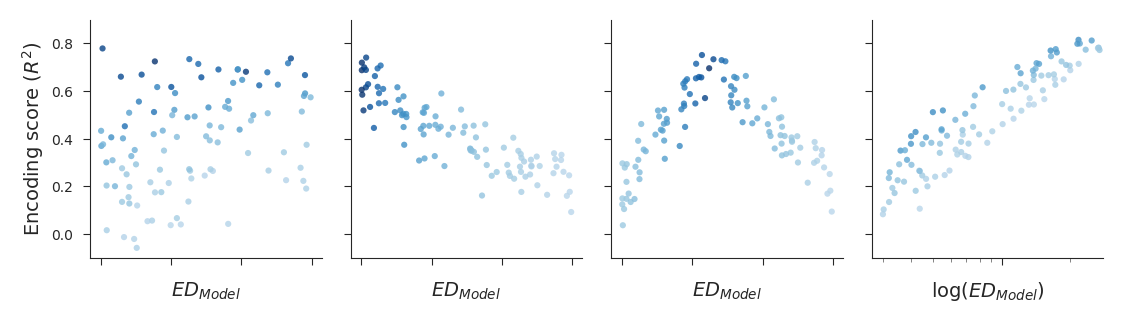

In [4]:
fig, axs = plt.subplots(1, 4, figsize=(5.5, 1.5))
cmap = sns.color_palette('Blues', as_cmap=True)

sns.scatterplot(data=data_uncorr, x='model_ed', y='r2_ceiled', hue='model_alignment_strength',
                linewidth=0, s=5, palette=cmap, hue_norm=(-0.4, 1), alpha=0.8, ax=axs[0])
axs[0].legend().remove()

sns.scatterplot(data=data_negcorr, x='model_ed', y='r2_ceiled', hue='model_alignment_strength',
                linewidth=0, s=5, palette=cmap, hue_norm=(-0.4, 1), alpha=0.8, ax=axs[1])
axs[1].legend().remove()

sns.scatterplot(data=data_invu, x='model_ed', y='r2_ceiled', hue='model_alignment_strength',
                linewidth=0, s=5, palette=cmap, hue_norm=(-0.4, 1), alpha=0.8, ax=axs[2])
axs[2].legend().remove()

sns.scatterplot(data=data_constant, x='model_ed', y='r2_ceiled', hue='model_alignment_strength',
                linewidth=0, s=5, palette=cmap, hue_norm=(-0.4, 1), alpha=0.8, ax=axs[3])
axs[3].legend().remove()

ylim = (-.1, 0.9)
axs[0].set(xlabel=r'$ED_{Model}$', ylabel=r'Encoding score ($R^2$)', ylim=ylim)
axs[1].set(xlabel=r'$ED_{Model}$', ylabel=None, ylim=ylim)
axs[2].set(xlabel=r'$ED_{Model}$', ylabel=None, ylim=ylim)
axs[3].set(xlabel=r'$\log (ED_{Model})$', ylabel=None, xscale='log', xlim=(None, 28), ylim=ylim)
for i in range(4):
    axs[i].axes.xaxis.set_ticklabels([])
    if i > 0:
        axs[i].axes.yaxis.set_ticklabels([])

plt.savefig('saved/simulations_results-outcomes.png', dpi=300)
plt.show()

---
# Varying ecological and experimental ED

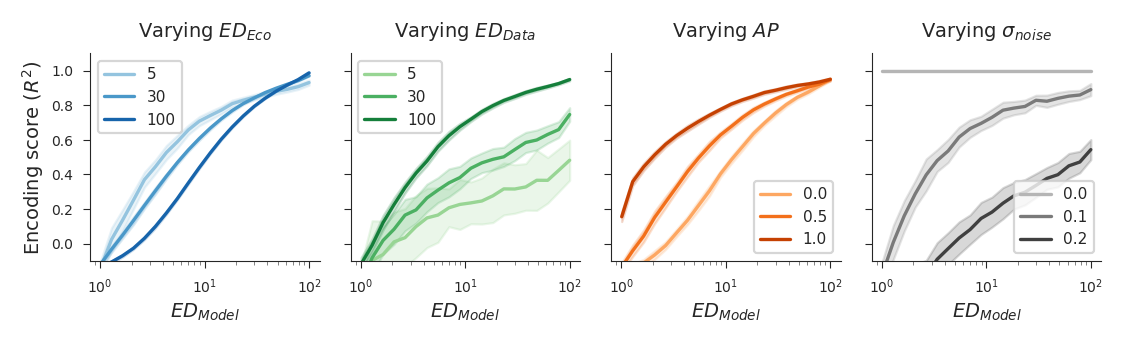

In [153]:
fig, axs = plt.subplots(1, 4, figsize=(5.5, 1.6))

sns.lineplot(data=data_eco, x='model_ed', y='r2_ceiled', hue='eco_ed',
             ci='sd', palette=sns.color_palette('Blues', 4)[1:], ax=axs[0])
axs[0].legend()

sns.lineplot(data=data_exp, x='model_ed', y='r2_ceiled', hue='data_ed',
             ci='sd', palette=sns.color_palette('Greens', 4)[1:], ax=axs[1])
axs[1].legend()

sns.lineplot(data=data_align, x='model_ed', y='r2_ceiled', hue='model_alignment_strength',
             ci='sd', palette=sns.color_palette('Oranges', 4)[1:], ax=axs[2])
axs[2].legend()

sns.lineplot(data=data_noise, x='model_ed', y='r2_ceiled', hue='resolution',
             ci='sd', palette=sns.color_palette('Greys', 4)[1:], ax=axs[3])
axs[3].legend()

axs[0].set(title=r'Varying $ED_{Eco}$', xlabel=r'$ED_{Model}$', 
           ylabel=r'Encoding score ($R^2$)', ylim=(-0.1, 1.1), xscale='log')
axs[1].set(title=r'Varying $ED_{Data}$', xlabel=r'$ED_{Model}$', 
           ylabel=None, ylim=(-0.1, 1.1), xscale='log')
axs[1].axes.yaxis.set_ticklabels([])
axs[2].set(title=r'Varying $AP$', xlabel=r'$ED_{Model}$', 
           ylabel=None, ylim=(-0.1, 1.1), xscale='log')
axs[2].axes.yaxis.set_ticklabels([])
axs[3].set(title=r'Varying $\sigma_{noise}$', xlabel=r'$ED_{Model}$', 
           ylabel=None, ylim=(-0.1, 1.1), xscale='log')
axs[3].axes.yaxis.set_ticklabels([])

plt.savefig('saved/simulations_results-sweep.png', dpi=300)
plt.show()